In [35]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import re
import seaborn as sns

In [36]:
# Pasta contendo os arquivos JSON
pasta_keywords = 'keywords_k'

# Lista para armazenar os DataFrames de cada arquivo
dataframes = []

# Itera sobre os arquivos na pasta
for nome_arquivo in os.listdir(pasta_keywords):
    caminho_arquivo = os.path.join(pasta_keywords, nome_arquivo)

    try:
        # Extrai o valor de k do nome do arquivo
        match = re.search(r'keywords_k=(\d+)', nome_arquivo)
        if match:
            k_value = int(match.group(1))
        else:
            k_value = None

        # Leitura do arquivo JSON com o encoding utf-8-sig
        with open(caminho_arquivo, 'r', encoding='utf-8-sig') as f:
            data = json.load(f)

        # Extrai a lista de itens sob a chave 'items'
        items = data.get('network', {}).get('items', [])

        # Converte para DataFrame
        df = pd.json_normalize(items)

        # Adiciona uma coluna 'k' com o valor extraído do nome do arquivo
        df['k'] = k_value

        # Adiciona o DataFrame à lista
        dataframes.append(df)

        # Conta o número de clusters únicos para cada valor de k
        num_clusters = df['cluster'].nunique()

    except json.JSONDecodeError as e:
        print(f"Erro ao decodificar o JSON em {caminho_arquivo}: {e}")
    except Exception as e:
        print(f"Erro desconhecido em {caminho_arquivo}: {e}")

# Concatena todos os DataFrames em um único DataFrame
df_completo = pd.concat(dataframes, ignore_index=True)

In [37]:
#Ordena o DataFrame por k
df_completo.sort_values(by='k', inplace=True)

In [38]:
# imprimir a cabeça do dataframe
df_completo.head()

,id,label,x,y,cluster,weights.Links,weights.Total link strength,weights.Occurrences,scores.Avg. pub. year,scores.Avg. citations,scores.Avg. norm. citations,k
1044,2045,tocqueville,-0.4663,0.1851,7,6.0,6.0,1.0,2013.0000,3.0,0.4561,1
730,1371,natural selection,-0.2484,0.2384,7,12.0,12.0,3.0,2016.0000,3.0,0.7907,1
731,1373,needs,-0.0819,-0.2440,8,8.0,8.0,1.0,2023.0000,0.0,0.0000,1
732,1374,negotiation,-0.3689,0.6957,26,7.0,7.0,1.0,2018.0000,7.0,2.9371,1
733,1377,neo-institutionalism,-0.2550,-0.4150,3,9.0,10.0,3.0,2016.3333,4.0,0.9920,1


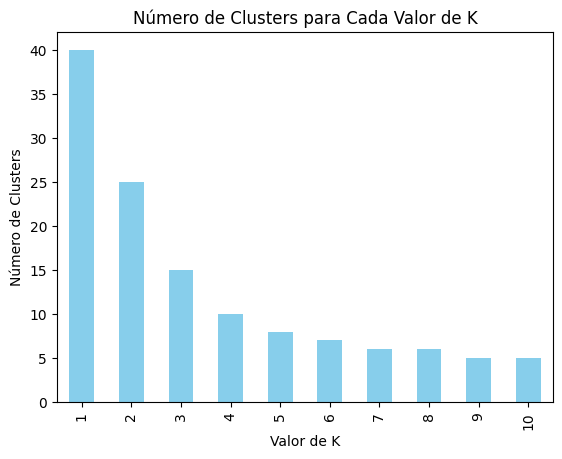

In [40]:
#Plotar com plt o numero de clusters por k sem sns

# Agrupa por k e conta o número de clusters únicos
df_plot = df_completo.groupby('k')['cluster'].nunique()

# Cria um gráfico de barras
df_plot.plot(x='k', y='num_clusters', kind='bar', color='skyblue')

plt.title('Número de Clusters para Cada Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Número de Clusters')
plt.show()